<a href="https://colab.research.google.com/github/CaptainAshis/Time_Series_Python-SQL/blob/master/TimeSeries2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
ls

drive/  sample_data/


In [0]:
from statsmodels.tsa.ar_model import AR,ARResults

In [0]:
%cd drive/'My Drive'/amex/

/content/drive/My Drive/amex


In [0]:
df=pd.read_csv('total-population-all-ages-including-armed-forces-overseas.csv',index_col='date',parse_dates=True)

In [0]:
df.index.freq='MS'

In [0]:
df.columns

Index(['realtime_end', 'realtime_start', 'value'], dtype='object')

In [0]:
df.drop(['realtime_end', 'realtime_start'],inplace=True,axis=1)

In [0]:
df.head()

,value
date,
1952-01-01,156309.0
1952-02-01,156527.0
1952-03-01,156731.0
1952-04-01,156943.0
1952-05-01,157140.0


In [0]:
df1=df[df.index>pd.to_datetime('2011-01-01')]

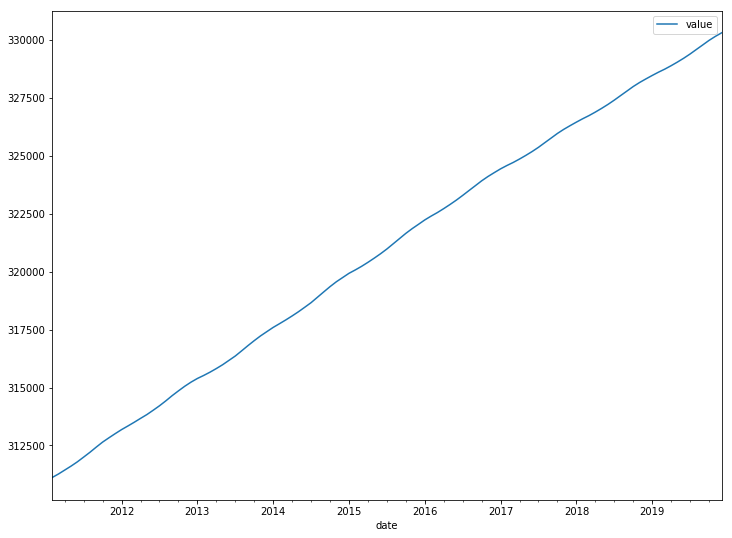

In [0]:
df1.plot(figsize=(12,9))

In [0]:
len(df1)-12

95

In [0]:
train=df1.iloc[:95]
test=df1.iloc[95:]
len(train),len(test)

(95, 12)

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
train.columns

Index(['value'], dtype='object')

# **AR model**

In [0]:
model=AR(train['value'])

In [0]:
AR1fit=model.fit(maxlag=1)
# To bring down the error make sure to play with different solver and methods and maxlags. Go for grid search using couple of for loops

In [0]:
AR1fit.aic,AR1fit.k_ar,AR1fit.params

(6.476175000121102, 1, const       448.141662
 L1.value      0.999171
 dtype: float64)

In [0]:
start=len(train);end=len(train)+len(test)-1
start,end

(95, 106)

In [0]:
# train.tail()

In [0]:
predictions1=AR1fit.predict(start=start,end=end)
predictions1.rename('AR(1) predictions',inplace=True)

2019-01-01    328494.783073
2019-02-01    328670.559283
2019-03-01    328846.189751
2019-04-01    329021.674599
2019-05-01    329197.013946
2019-06-01    329372.207915
2019-07-01    329547.256624
2019-08-01    329722.160195
2019-09-01    329896.918747
2019-10-01    330071.532402
2019-11-01    330246.001280
2019-12-01    330420.325499
Freq: MS, Name: AR(1) predictions, dtype: float64

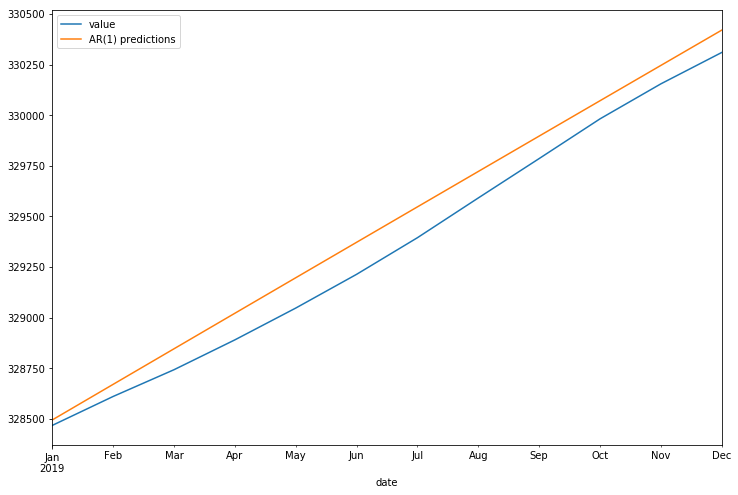

In [0]:
test.plot(figsize=(12,8),legend=True)
predictions1.plot(legend=True)

In [0]:
AR2fit=model.fit(maxlag=2)
# 2 time step lagging in order to predict the next time step

In [0]:
AR2fit.params

const       160.522992
L1.value      1.802993
L2.value     -0.803382
dtype: float64

In [0]:
predictions2=AR2fit.predict(start,end)
predictions2=predictions2.rename('AR(2) predictions')

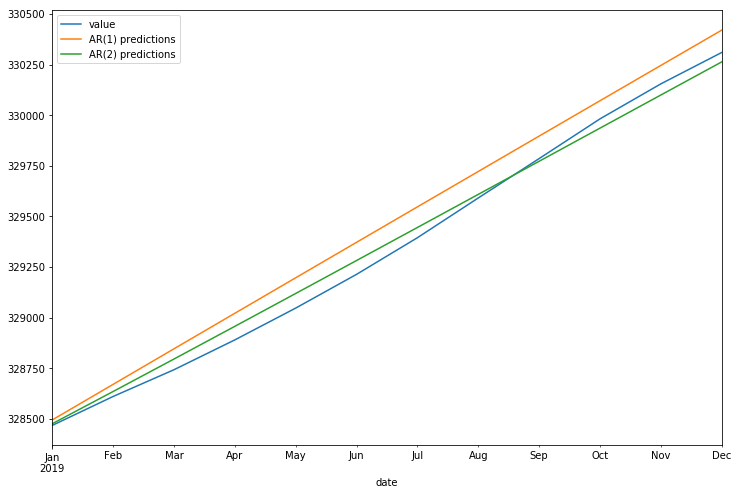

In [0]:
test.plot(figsize=(12,8),legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
# Order 2 line orange green is close to the actuals and isnt overestimatimng as the order 1 (Orange one)

Choose the best order

In [0]:
# Let the statsmodel choose the order value (p) for us

In [0]:
ARfit=model.fit(ic='t-stat')# ic is used to select the optimal lag length. Expt with ic to get the best lag and then we use rmse to figure out which one performed best
# Ic=information criterion

In [0]:
predictions8=ARfit.predict(start,end)
predictions8=predictions8.rename('AR (8) Predictions')

In [0]:
ARfit.params

const        136.236753
L1.value       1.721119
L2.value      -0.807231
L3.value       0.393496
L4.value      -0.706846
L5.value       0.600997
L6.value      -0.633950
L7.value       0.730666
L8.value      -0.473482
L9.value       0.647816
L10.value     -0.835485
L11.value      0.707588
L12.value     -0.345054
dtype: float64

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
labels=['AR1','AR2','AR12']
preds=[predictions1,predictions2,predictions8]

In [0]:
for i in range(3):
  error=mean_squared_error(test['value'],preds[i])
  print(f'{labels[i]} MSE was :{error}')

AR1 MSE was :13401.280622177772
AR2 MSE was :2347.0149764927996
AR12 MSE was :703.6414636855558


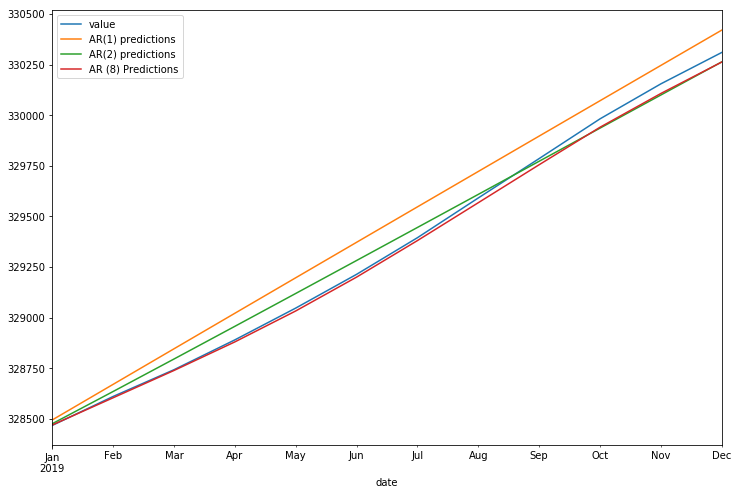

In [0]:
test.plot(figsize=(12,8),legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions8.plot(legend=True)
# By looking 12 months into the past we can accurately predict what will be the US Popln in the 13th month

In [0]:
# Retrain the model for new future unknown

In [0]:
model=AR(df1['value'])
ARfit=model.fit()
forecasted_values=ARfit.predict(start=len(df1),end=len(df1)+12).rename('Forecast')

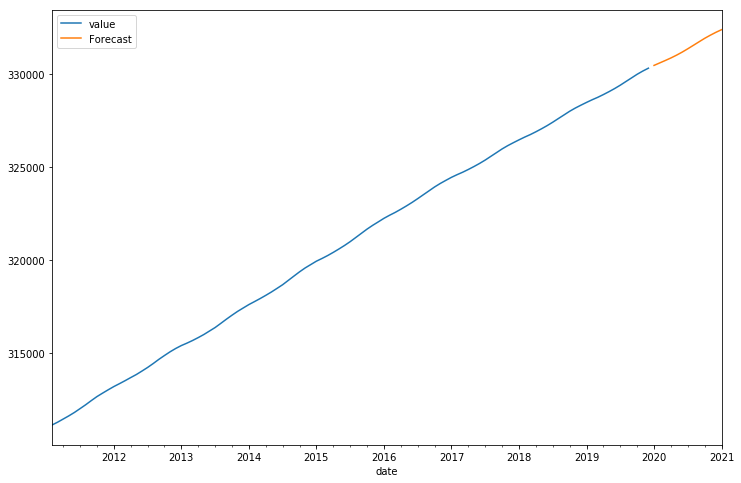

In [0]:
df1['value'].plot(figsize=(12,8),legend=True)
# predictions1.plot(legend=True)
# predictions2.plot(legend=True)
forecasted_values.plot(legend=True)
# By looking 12 months into the past we can accurately predict what will be the US Popln in the 13th month

# **Dickey Fueller Test and Granger causality tests**
## Also evaluating forecast predictions and exposing seasonality of month using plots

In [0]:
df=pd.read_csv('airline.csv')
df.columns

Index(['Month', 'Passengers'], dtype='object')

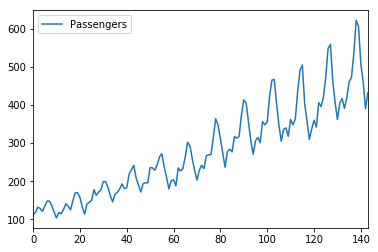

In [0]:
df.plot()

In [0]:
from statsmodels.tsa.stattools import adfuller

In [0]:
adfuller(df['Passengers'])

(0.815368879206047,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 996.6929308390189)

In [0]:
# help(adfuller)

In [0]:
dfTest=adfuller(df['Passengers'])
dfOut=pd.Series(dfTest[0:4],index=['ADF Test Statistics','p-value','# Lags used','# Observations'])

In [0]:
for k , v in dfTest[4].items():
  dfOut[f'critical value ({k})']=v

In [0]:
dfOut

ADF Test Statistics       0.815369
p-value                   0.991880
# Lags used              13.000000
# Observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64

In [0]:
# To interpret AD fuller test , understand it via the p-value 

In [0]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
  """Pass in a time series and an optional title, returns an adf report"""
  print(f'Augmented Dickey Fuller Test:{title}')
  result=adfuller(series.dropna(),autolag='AIC') # dropna handles the differenced data
  
  labels=['ADF Test Statistics','p-value','# Lags used','# Observations']
  out=pd.Series(result[0:4],index=labels)
  
  for k , v in result[4].items():
    out[f'critical value ({k})']=v
    
  print(out.to_string()) # to_string() removes the line "dtype:float64"
  
  if result[1]<=0.05:
    print("Strong evidence against the null hypothesis")
    print("Reject the null hypothesis")
    print("Data has no unit root and is stationary")
  else:
    print("Weak evidence against the null hypothesis")
    print("Fail the null hypothesis")
    print("Data has a unit root and is non-stationary")
    
    

In [0]:
adf_test(df['Passengers'])

Augmented Dickey Fuller Test:
ADF Test Statistics       0.815369
p-value                   0.991880
# Lags used              13.000000
# Observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
Weak evidence against the null hypothesis
Fail the null hypothesis
Data has a unit root and is non-stationary


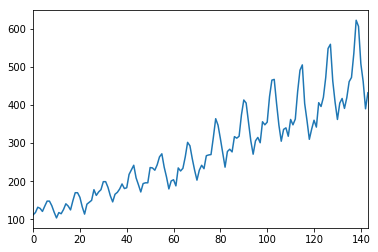

In [0]:
df['Passengers'].plot() 
# Its non-stationary as there is seasonality and trend to it

In [0]:
from statsmodels.tsa.stattools import grangercausalitytests
# Loo for lag where p value<0.05 there is  causality at that lag
# grangercausalitytests(df3[['a','d']],maxlag=3)

In [0]:
np.random.seed(42)

df=pd.DataFrame(np.random.randint(20,30,(50,2)),columns=['test','predictions'])

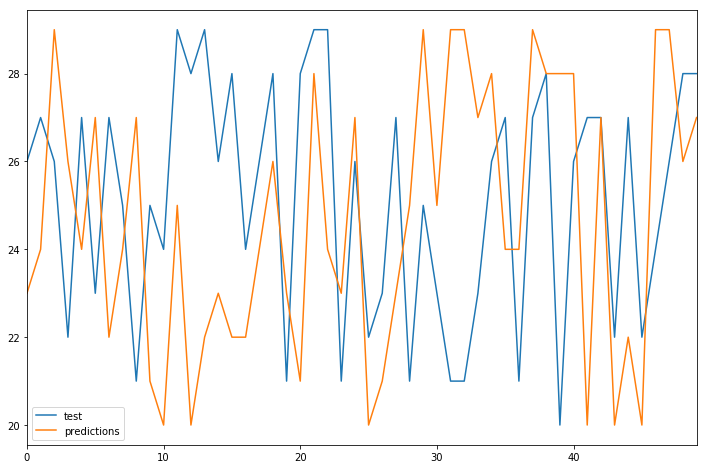

In [0]:
df.plot(figsize=(12,8))

In [0]:
from statsmodels.tools.eval_measures import mse,rmse,meanabs

In [0]:
meanabs(df['test'],df['predictions'])

3.54

In [0]:
df=pd.read_csv('airline.csv',index_col='Month',parse_dates=True)
df.index.freq='MS'

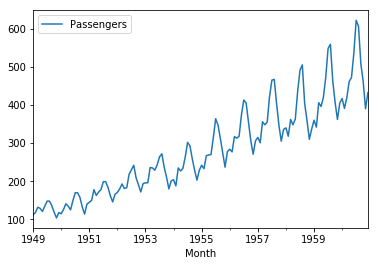

In [0]:
df.plot()

In [0]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot
# Statsmodel can seperate these out for month and quarters

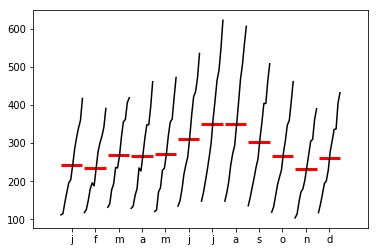

In [0]:
month_plot(df['Passengers']);
# More people are travelling during june and july

In [0]:
dfq=df['Passengers'].resample(rule='Q').mean()

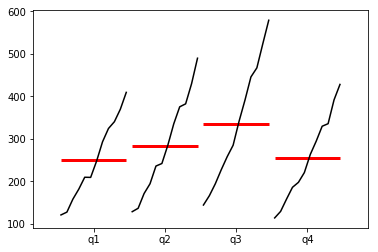

In [0]:
quarter_plot(dfq);

In [0]:
# This is all about evaluating forecast predictions and exposing seasonality of month using plots